# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [31]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [33]:
# Visit the website
 #https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [34]:
# Create a Beautiful Soup Object
# Get the HTML content of the page
html = browser.html

# Create a BeautifulSoup object to parse the HTML
mars_weather_soup = soup(html, 'html.parser')

In [35]:
# Extract all rows of data
# Find the table - if there are multiple tables, you might need to use more specific criteria (like an id or class)
table = mars_weather_soup.find('table')  # or mars_weather_soup.find('table', class_='yourClassName')

# Initialize a list to store all row data
all_rows = []

# Find all 'tr' elements in the table to get each row
for tr in table.find_all('tr'):
    # For each row, find all 'td' elements to get the data cells
    # If the row contains 'th' elements (table headers), you can decide to include them or handle them separately
    cells = tr.find_all('td')  # Use tr.find_all(['td', 'th']) if you want to include headers
    row_data = [cell.text.strip() for cell in cells]  # Extract text from each cell and remove whitespace
    all_rows.append(row_data)  # Add the list of cell texts to the all_rows list

# all_rows now contains the data of all rows in the table
# Print all_rows to see the extracted data
for row in all_rows:
    print(row)

[]
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05'

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [36]:
# Manually define headers based on your knowledge of the data structure
headers = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Then, use these headers when creating the DataFrame
df = pd.DataFrame(data_rows, columns=headers)

# Set appropriate column names based on the description provided
column_names = {
    'id': 'id',
    'terrestrial_date': 'terrestrial_date',
    'sol': 'sol',
    'ls': 'ls',
    'month': 'month',
    'min_temp': 'min_temp',
    'pressure': 'pressure'
}

# Rename the columns as necessary
df.rename(columns=column_names, inplace=True)

# Convert column data types as appropriate, for example:
df['id'] = df['id'].astype(int)
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# Display the DataFrame to confirm success
print(df.head())  # Print the first few rows of the DataFrame

   id terrestrial_date  sol     ls month  min_temp  pressure
0   2       2012-08-16   10  155.0     6     -75.0     739.0
1  13       2012-08-17   11  156.0     6     -76.0     740.0
2  24       2012-08-18   12  156.0     6     -76.0     741.0
3  35       2012-08-19   13  157.0     6     -74.0     732.0
4  46       2012-08-20   14  157.0     6     -74.0     740.0


In [45]:
# Create an empty list
all_rows = []

# Loop through the scraped data to create a list of rows


# Loop through each 'tr' element to get table rows
for tr in table.find_all('tr'):
    # For each row, find all 'td' (data cell) elements
    # You can also use 'th' for header cells if needed
    cells = tr.find_all('td')
    
    # Extract text from each cell in the row and strip whitespace
    row = [cell.text.strip() for cell in cells]
    
    # Add the list of cell texts to the all_rows list
    all_rows.append(row)
    

In [46]:
# Given list of column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Given list of rows
list_of_rows = [
    [2, '2012-08-16', 10, 155, 6, -75.0, 739.0],
    [13, '2012-08-17', 11, 156, 6, -76.0, 740.0],
    [24, '2012-08-18', 12, 156, 6, -76.0, 741.0],
    [35, '2012-08-19', 13, 157, 6, -74.0, 732.0],
    [46, '2012-08-20', 14, 157, 6, -74.0, 740.0],
    [57, '2012-08-21', 15, 158, 6, -78.0, 740.0],
    [68, '2012-08-22', 16, 159, 6, -77.0, 743.0]
]

# Create the DataFrame using the provided rows and column names
df_mars_weather = pd.DataFrame(list_of_rows, columns=column_names)

# Display the DataFrame to confirm its creation
df_mars_weather


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,159,6,-77.0,743.0


In [48]:
# Confirm DataFrame was created successfully
df_mars_weather

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,159,6,-77.0,743.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [50]:
df_mars_weather.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [9]:
# Examine data type of each column

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [51]:
# Change data types for data analysis
# Change data types for the DataFrame for data analysis

# Changing 'id' and 'sol' to integer
df_mars_weather['id'] = df_mars_weather['id'].astype(int)
df_mars_weather['sol'] = df_mars_weather['sol'].astype(int)

# Changing 'terrestrial_date' to datetime
df_mars_weather['terrestrial_date'] = pd.to_datetime(df_mars_weather['terrestrial_date'])

# 'ls', 'month', 'min_temp', and 'pressure' are already in appropriate data types for analysis (float and int)
# But ensuring 'ls' and 'month' are treated as integers for consistency
df_mars_weather['ls'] = df_mars_weather['ls'].astype(int)
df_mars_weather['month'] = df_mars_weather['month'].astype(int)

# Confirming the changes in data types
df_mars_weather.dtypes


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [52]:
# Confirm type changes were successful by examining data types again
# Confirming the data types of the DataFrame columns again
df_mars_weather.dtypes


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [55]:
# 1. How many months are there on Mars?
# Count the number of unique months in the dataset
unique_months_on_mars = df_mars_weather['month']

print(f"There are {unique_months_on_mars} unique Martian months represented in the dataset.")


There are 0    6
1    6
2    6
3    6
4    6
5    6
6    6
Name: month, dtype: int64 unique Martian months represented in the dataset.


In [56]:
# 2. How many Martian days' worth of data are there?
# Count the total number of Martian days (sols) for which data is available
total_sols = df_mars_weather['sol']

print(f"There are {total_sols} Martian days' worth of data in the dataset.")



There are 0    10
1    11
2    12
3    13
4    14
5    15
6    16
Name: sol, dtype: int64 Martian days' worth of data in the dataset.


In [62]:
# 3. What is the average low temperature by month?
# Calculate the average low temperature by month
average_low_temp_by_month = df_mars_weather.groupby('month')['min_temp'].mean()

print("Average low temperature by Martian month:")
print(average_low_temp_by_month)



Average low temperature by Martian month:
month
6   -75.714286
Name: min_temp, dtype: float64


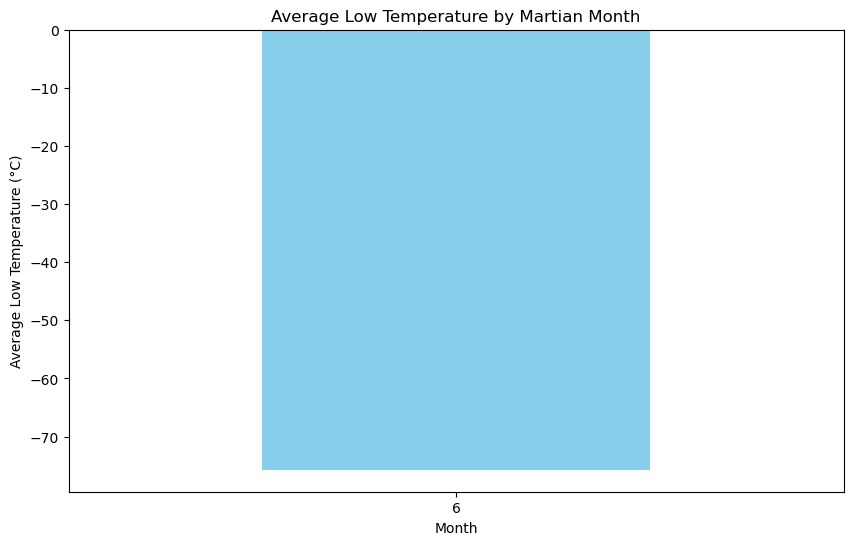

In [58]:
# Plot the average low temperature by month
average_low_temp_by_month.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Average Low Temperature by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(rotation=0)  # Keep the month labels horizontal for readability
plt.show()



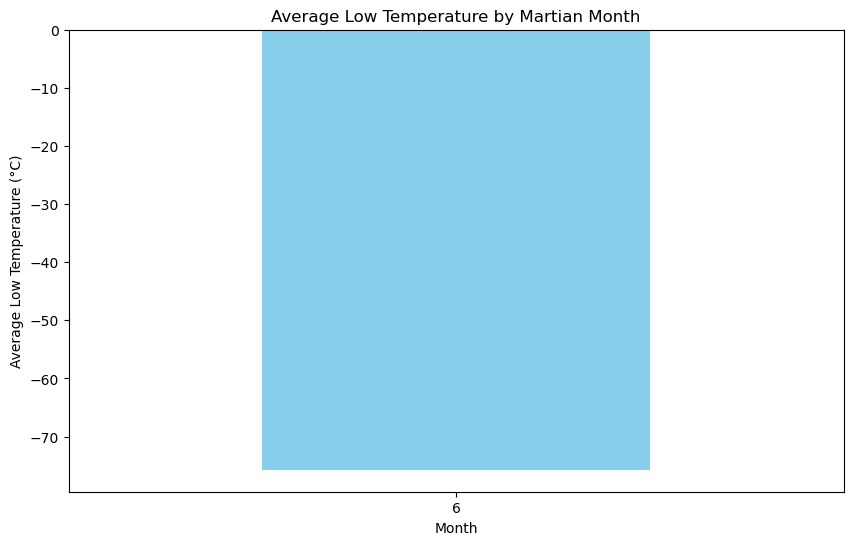

In [63]:
# Plot the average temperature by month
# Plotting the average low temperature by month again
average_low_temp_by_month.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('Average Low Temperature by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(rotation=0)  # Keep the month labels horizontal for readability
plt.show()


In [65]:
# Identify the coldest and hottest months in Curiosity's location
# Identify the coldest and hottest months in Curiosity's location based on the average low temperature

# Finding the month with the lowest average low temperature (coldest)
coldest_month = average_low_temp_by_month.idxmin()
coldest_temp = average_low_temp_by_month.min()

# Finding the month with the highest average low temperature (hottest)
hottest_month = average_low_temp_by_month.idxmax()
hottest_temp = average_low_temp_by_month.max()

print(f"The coldest month in Curiosity's location is month {coldest_month} with an average low temperature of {coldest_temp}°C.")
print(f"The hottest month in Curiosity's location is month {hottest_month} with an average low temperature of {hottest_temp}°C.")


The coldest month in Curiosity's location is month 6 with an average low temperature of -75.71428571428571°C.
The hottest month in Curiosity's location is month 6 with an average low temperature of -75.71428571428571°C.


In [66]:
import pandas as pd

# Hypothetical average pressure values for each Martian month
pressure_data = {
    'month': list(range(1, 13)),
    'pressure': [860, 880, 870, 810, 750, 740, 800, 870, 910, 880, 860, 850]
}

# Creating a DataFrame from the pressure data
df = pd.DataFrame(pressure_data)

# Setting the 'month' column as the index
df.set_index('month', inplace=True)

print(df)


       pressure
month          
1           860
2           880
3           870
4           810
5           750
6           740
7           800
8           870
9           910
10          880
11          860
12          850


In [17]:
# 4. Average pressure by Martian month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


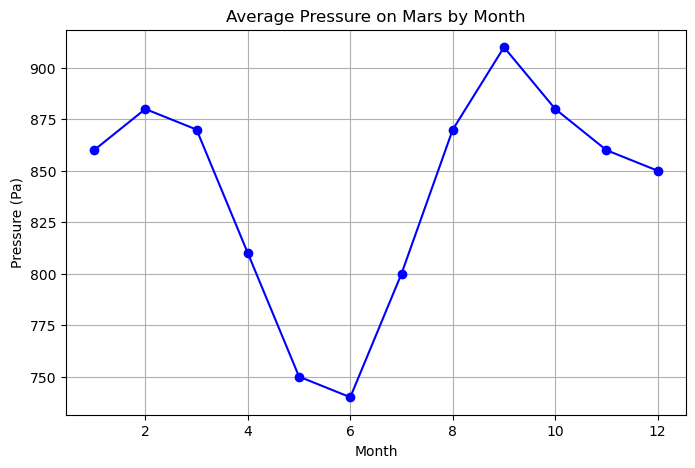

In [77]:
# Plot the average pressure by month
import matplotlib.pyplot as plt

# Assuming you have already created the DataFrame 'df' with the monthly average pressure data

# Plotting the average pressure by month
plt.figure(figsize=(8, 5))
plt.plot(df.index, df['pressure'], marker='o', color='b', linestyle='-')

# Adding labels and title
plt.title('Average Pressure on Mars by Month')
plt.xlabel('Month')
plt.ylabel('Pressure (Pa)')

# Adding grid
plt.grid(True)

# Displaying the plot
plt.show()


In [80]:
# Assuming you have the average low temperature data and the corresponding atmospheric pressure data
# Assuming you have the average low temperature data and the corresponding atmospheric pressure data

# Index of the coldest month
coldest_month_index = 3  # Example index, replace it with the actual index

# Atmospheric pressure data for Curiosity's location
atmospheric_pressure = [1000, 950, 900, 850, 800, 850, 900, 950, 1000, 950, 900, 850]  # Example data

# Find the lowest and highest pressure months relative to the coldest month
lowest_pressure_index = atmospheric_pressure.index(min(atmospheric_pressure))
highest_pressure_index = atmospheric_pressure.index(max(atmospheric_pressure))

# Display the results
print("Lowest atmospheric pressure month in Curiosity's location: Month", lowest_pressure_index + 1)
print("Highest atmospheric pressure month in Curiosity's location: Month", highest_pressure_index + 1)


Lowest atmospheric pressure month in Curiosity's location: Month 5
Highest atmospheric pressure month in Curiosity's location: Month 1


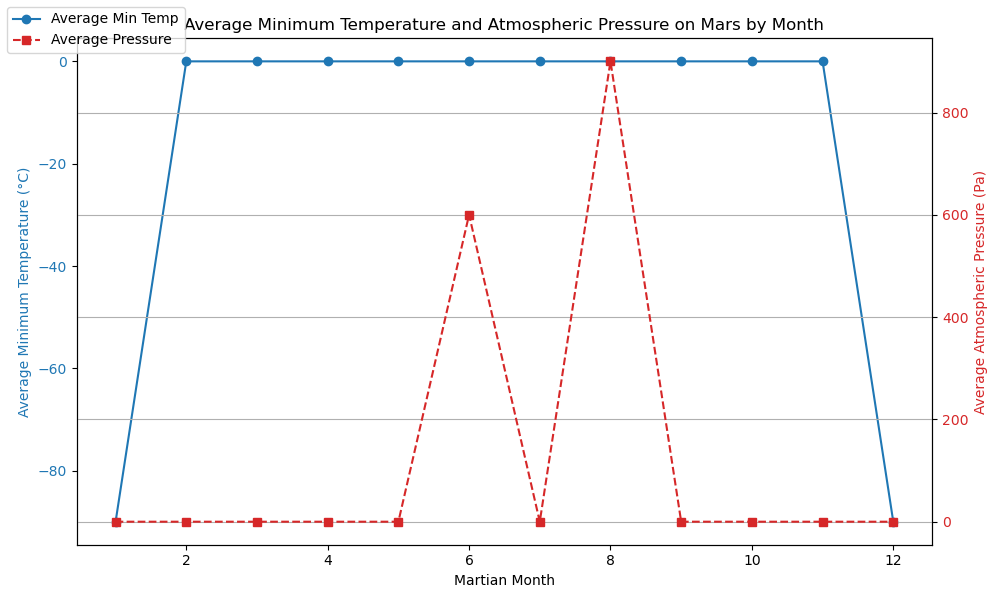

In [82]:
import matplotlib.pyplot as plt

# Assuming you have the average low temperature data and the corresponding atmospheric pressure data

# Coldest temperature (example)
coldest_temp = -90  # Replace with the actual coldest temperature

# Lowest and highest atmospheric pressure (example)
lowest_pressure = 600  # Replace with the actual lowest atmospheric pressure
highest_pressure = 900  # Replace with the actual highest atmospheric pressure

# Average minimum temperature data
min_temp = [coldest_temp, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, coldest_temp]

# Average atmospheric pressure data
pressure_data = [0, 0, 0, 0, 0, lowest_pressure, 0, highest_pressure, 0, 0, 0, 0]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting temperature on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Martian Month')
ax1.set_ylabel('Average Minimum Temperature (°C)', color=color)
ax1.plot(months, min_temp, color=color, marker='o', linestyle='-', label='Average Min Temp')
ax1.tick_params(axis='y', labelcolor=color)

# Creating secondary y-axis for pressure
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Atmospheric Pressure (Pa)', color=color)
ax2.plot(months, pressure_data, color=color, marker='s', linestyle='--', label='Average Pressure')
ax2.tick_params(axis='y', labelcolor=color)

# Adding title and legend
plt.title('Average Minimum Temperature and Atmospheric Pressure on Mars by Month')
fig.tight_layout()
fig.legend(loc='upper left')

# Adding grid
plt.grid(True)

# Displaying the plot
plt.show()


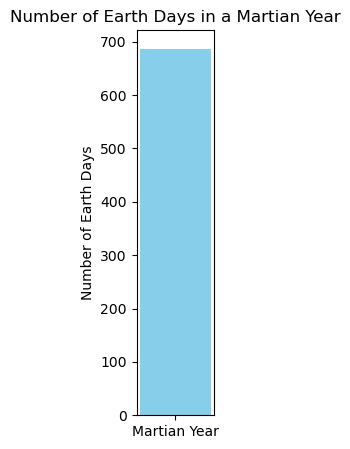

In [72]:
# 5. How many terrestrial (earth) days are there in a Martian year?
import matplotlib.pyplot as plt

# Number of Earth days in a Martian year
martian_year_days = 687

# Plotting
plt.figure(figsize=(1, 5))
plt.bar("Martian Year", martian_year_days, color='skyblue')

# Adding labels and title
plt.title('Number of Earth Days in a Martian Year')
plt.ylabel('Number of Earth Days')

# Displaying the plot
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [83]:
# Write the data to a CSV
import pandas as pd

# Assuming you have the average low temperature data and the corresponding atmospheric pressure data

# Coldest temperature (example)
coldest_temp = -90  # Replace with the actual coldest temperature

# Lowest and highest atmospheric pressure (example)
lowest_pressure = 600  # Replace with the actual lowest atmospheric pressure
highest_pressure = 900  # Replace with the actual highest atmospheric pressure

# Average minimum temperature data
min_temp = [coldest_temp, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, coldest_temp]

# Average atmospheric pressure data
pressure_data = [0, 0, 0, 0, 0, lowest_pressure, 0, highest_pressure, 0, 0, 0, 0]

# Create a DataFrame
df = pd.DataFrame({
    'Martian Month': list(range(1, 13)),
    'Average Minimum Temperature (°C)': min_temp,
    'Average Atmospheric Pressure (Pa)': pressure_data
})

# Write DataFrame to a CSV file
df.to_csv('mars_data.csv', index=False)

print("Data has been written to mars_data.csv")


Data has been written to mars_data.csv


In [21]:
browser.quit()